<h1>Mobile Survey Analysis</h1>
<p>Segmenting customers based on different psychometric and behavior measures. A survey was passed out and now will be used to determine differences between the groups of customers we cater to.</p>

In [269]:
# importing libraries

import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
np.set_printoptions(threshold=sys.maxsize)


In [270]:
#creating functions for future use and analysis

# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch,
                colors  = None,
                x_label = "First principal component",
                y_label = "Second principal component"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
x_label      : x-label for PC 0, default "First principal component"
y_label      : y-label for PC 1, default "Second principal component"
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 219)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

    

# scree_plot
def scree_plot(pca_object, x_value = None, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    
    # make condition to make line for x_value to be red
    if x_value == None: 
        x_vlue = None
    else:
        plt.axvline(x = x_value, color = 'red')
    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    
    
# unsupervised scaler
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [271]:
# change data type of caseID
dtypes = {'caseID':str}

# reading the data 
survey = pd.read_excel(io = 'Mobile_App_Survey_Data.xlsx', dtype = dtypes)

# looking for overall data
survey.head(n = 5)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2


In [272]:
# separate demographic, behaviour-measures (11 & 12), purchase psych-behaviour (26), personality(25) and usage(24 & 13)

demographic = survey.loc[:,['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11','q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']]

behaviour = survey.loc[:,['q11', 'q12']]

psychometric_behavior = survey.loc[:,[ 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']]

psychometric_personality = survey.loc[:,['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12']]

psychometric_usage = survey.loc[:,[ 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12',]]

# save column names for when we scale by rows
psychometric_behavior_columns = psychometric_behavior.columns
psychometric_personality_columns = psychometric_personality.columns
psychometric_usage_columns = psychometric_usage.columns

<h1>Psychometric behavior</h1>
<p>It addresses human abilities, attitudes and approaches towards technology and shopping. </p>

In [273]:
# create array for the data
rowwise = np.array(psychometric_behavior)

# transpose data from row to column
rowwiseT = rowwise.T

# converting to a DataFrame for transpose data
rowwisedf = pd.DataFrame(rowwiseT)

# applying the unsupervised_scaler function to standardize answers for each person
rowwise_scaled = unsupervised_scaler(rowwisedf)

# create the array for rowwise_scaled and transpose data again
rowwise_scaled_array = np.array(rowwise_scaled)
rowwise_scaled_arrayT = rowwise_scaled_array.T

# converting to a DataFrame for transpose data
psychometric_behavior = pd.DataFrame(rowwise_scaled_arrayT)

# reattaching column names
psychometric_behavior.columns = psychometric_behavior_columns

# applying the unsupervised_scaler function to standardize answers for each question
psychometric_behavior_scaled = unsupervised_scaler(psychometric_behavior)

#https://stackoverflow.com/questions/64028321/how-do-i-get-sklearn-standardscale-in-rows-and-not-the-columns

<h2>Scree Plot</h2>
<p>The scree plot is used to determine the number of components to use, this helps us capture only components that have high variance. The assumption is we will select the number of components at a point of the elbow. This specific measure derived five PCA components which symbolize the psychometric analysis based on the survey. This is shown by the red line in the graph, and these explain 45% of the variation in the data.</p>

<h2>PERSONAS</h2>
    <p>The personas are fictional character personalities. We create a name for each group of users.</p>

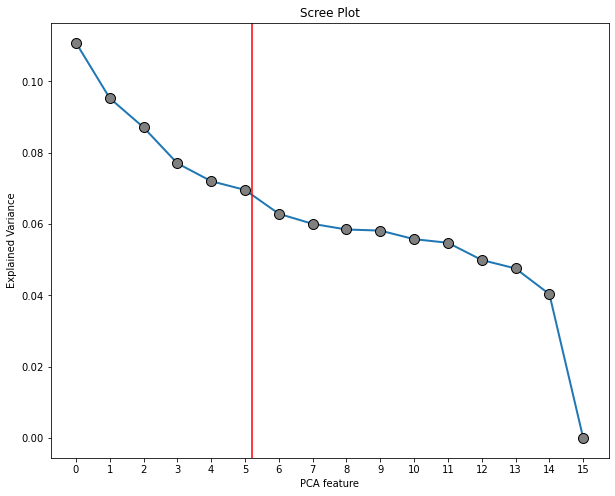

In [274]:
# INSTANTIATING a PCA object with no limit to principal components
pca_all = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_pca_all = pca_all.fit_transform(psychometric_behavior_scaled)

# calling the scree_plot function
scree_plot(pca_all, x_value = 5.2, export = False)

# INSTANTIATING a PCA object with 5 components
pca = PCA(n_components = 5,
          random_state = 219)

# FITTING and TRANSFORMING the scaled data
psychometric_behavior_pca = pca.fit_transform(psychometric_behavior_scaled)


<p>The five PCA components were labeled as follows:</p>
<ol>
  <li><strong>Money conscious shopaholic:</strong> People who like shopping but are still concerned about the price of a product. They are clear and conscious about the money they spend during shopping. 
   <p>The high variance here indicates people who are conscious about the money they are investing in shopping whereas the low value indicates that they are not money-conscious.</p></li>
    <br>
  <li><strong>Big tech spender:</strong> People who like to spend on tech. These people invest a lot in technology and believe that technology connects people and all around the world.
    <p>The higher variance shows that these people invest a lot in technology whereas lower the variance indicates they don't spend much on technology.</p></li>
    <br>
  <li><strong>Big Non-tech spender:</strong> People who like to shop for non-tech products. They choose their arena of shopping on things other than technology. Aside from tech products, we find that these indivdiuals spend on shopping and believe that technology is not a key component in connecting people.
    <p>The higher variance identifies people who don't invest a lot in technology but invest in other things.</p> </li>
    <br>
    <li><strong>Working parent (young child):</strong> Working parent who has capability to buy but stands on a limited budget and children has a lot of impact on the decision.
    <p>The higher variance shows that they are more responsible in connecting the needs of the family other than investing in technology in which he is capable enough.</p></li>
    <br>
    <li><strong>On a budget:</strong> A self-money management person who looks for packages deals and always tends to shop on a budget, he doesn't believe that brands bring style when it comes to fashion choices.
        <p>The higher variance indicates the more he stands on budget. Lower variance indicates the person is not frugal in spending
</p>
    </li>
</ol>

In [275]:
# transposing pca components
factor_loadings_df_psychometric_behavior = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings_df_psychometric_behavior = factor_loadings_df_psychometric_behavior.set_index(psychometric_behavior.columns)

# saving to Excel
factor_loadings_df_psychometric_behavior.to_excel('psychometric_factor_loadings.xlsx')

In [276]:
# analyzing factor strengths per customer
factor_loadings = pca.transform(psychometric_behavior_scaled)

# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)

# naming each principal component
factor_loadings_df.columns = ['money conscious shopaholic', 'big tech spender', 'big non tech spender', 'working parent (young child)', 'on a budget']


In [277]:
# scaling the pca
pca_scale = unsupervised_scaler(factor_loadings_df)

# exploring customers in the Healthfood Heroes persona
print(f"""Number of people over one stdev above: {len(pca_scaled['big tech spender'][pca_scaled['big tech spender'] > 1.0])} in big tech spender""")
print(f"""Number of people over one stdev below: {len(pca_scaled['big tech spender'][pca_scaled['big tech spender'] < -1.0])} in big tech spender""")
print(f"""Number of people over one stdev above: {len(pca_scaled['big non tech spender'][pca_scaled['big non tech spender'] > 1.0])} in big non tech spender""")
print(f"""Number of people over one stdev below: {len(pca_scaled['big non tech spender'][pca_scaled['big non tech spender'] < -1.0])} in big non tech spender""")

Number of people over one stdev above: 230 in big tech spender
Number of people over one stdev below: 279 in big tech spender
Number of people over one stdev above: 221 in big non tech spender
Number of people over one stdev below: 273 in big non tech spender


<h1>Psychometric usage</h1>
<p>It addresses how people perceive they use technology and applications in everyday life.</p>

In [278]:
#scaling the data so pca can draw a line through it correctly

# create array for the data and transpose data from row to column
rowwise = np.array(psychometric_usage)
rowwiseT = rowwise.T

#converting to a DataFrame for transpose data
rowwisedf = pd.DataFrame(rowwiseT)

# applying the unsupervised_scaler function to standardize answers for each person
rowwise_scaled = unsupervised_scaler(rowwisedf)

# create the array for rowwise_scaled and transpose data again
rowwise_scaled_array = np.array(rowwise_scaled)
rowwise_scaled_arrayT = rowwise_scaled_array.T

# converting to a DataFrame for transpose data
psychometric_usage = pd.DataFrame(rowwise_scaled_arrayT)

# reattaching column names
psychometric_usage.columns = psychometric_usage_columns

# applying the unsupervised_scaler function to standardize answers for each question
psychometric_usage_scaled = unsupervised_scaler(psychometric_usage)

<p> For the survey information about customers' usage of technology and apps, the increase in variance provided by each extra PCA column diminished at 6 components. Although this only explains about 50% of the variance, it is unlikely that extra components will provide much information about the variance of the data.
</p>

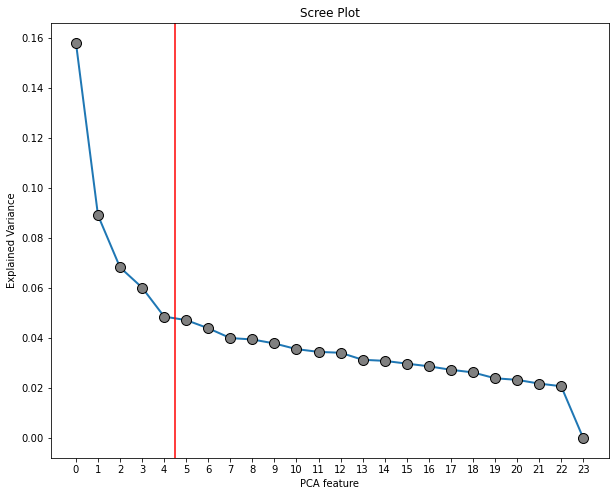

In [279]:
# INSTANTIATING a PCA object with no limit to principal components
psychometric_usage_scaled_pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_usage_scaled_pca_all = psychometric_usage_scaled_pca.fit_transform(psychometric_usage_scaled)

# calling the scree_plot function
scree_plot(psychometric_usage_scaled_pca, x_value = 4.5, export = False)

# INSTANTIATING a PCA object with 6 components
psychometric_usage_scaled_pca = PCA(n_components = 6,
          random_state = 219)

# FITTING and TRANSFORMING the scaled data
psychometric_usage_scaled_pca_all = psychometric_usage_scaled_pca.fit_transform(psychometric_usage_scaled)

The six PCA components that were created were:
<ol>
    <li><strong>Golden age:</strong> This pertains to people who have an old lifestyle; they use apps that peaked years ago and don’t keep up with technology or use it to replace meeting in person at all.  
        <p>A high value means they tend more towards using these types of apps and tend to use tech less than the average population. A low value would mean people use technology more often and use more current apps than those this group does.</p></li>
    <br>
    <li><strong>Tech hater:</strong> These are people we observed have a strong feelings against everything technology related, don't use many apps often and still meet people in person. They are just not interested in tech because they keep up with the news.   
        <p>A high value relates to someone hating technology more than the average person, whereas low values are people who like technology and want more of it in their life.</p></li>
    <br>
<li><strong>Online communication:</strong> People who use tech just for communication. They use it to keep in touch with friends and family, but don’t use it a lot during the day.
    <p>A high value shows a person tends to avoid technology except when using it to contact friends. A low value relates to people who avoid technology less, but doesn’t necessarily use it to connect with friends and family.</p></li>
    <br>
    <li><strong>Info/news junkie:</strong> People who use tech for education or to read news, but not for entertainment.
    <p>The high value means people who avoids the internet except to read news on yahoo or AOL. A low value would mean someone uses the internet more for other things such as entertainment or networking or doesn’t use it at all.</p></li>
    <br>
    <li><strong>Networking junkie:</strong> People who use tech to connect with others, not for entertainment. They also do not use it to control aspects of their life, just to meet new interesting people, especially on LinkedIn. 
    <p>The high value means some people are only active on networking sites but don’t use technology much apart from this. People who do not network at all would have lower values.</p></li>
    <br>
    <li><strong>Hard worker:</strong> These people tend to use technology to learn new skills and information. Their applications also save them time because they want to get a lot of things done quickly.
    <p>A high value means people tend to use technology more for work than for entertainment, whereas a low value means they don't think technology makes them much more efficient.</p></li>
</ol>

In [280]:
# transposing pca components
factor_loadings_df_psychometric_usage = pd.DataFrame(np.transpose(psychometric_usage_scaled_pca.components_))


# naming rows as original features
factor_loadings_df_psychometric_usage = factor_loadings_df_psychometric_usage.set_index(psychometric_usage.columns)

# saving to Excel
factor_loadings_df_psychometric_usage.to_excel('psychometric_usage_factor_loadings.xlsx')


In [281]:
# analyzing factor strengths per customer
factor_loadings_psychometric_usage = psychometric_usage_scaled_pca.transform(psychometric_usage_scaled)

# converting to a DataFrame
factor_loadings_df_psychometric_usage = pd.DataFrame(factor_loadings_psychometric_usage)

# naming each principal component
factor_loadings_df_psychometric_usage.columns = ['Golden age', 'tech hater', 'online communication', 'info/news junkie', 'networking junkie', 'hard worker']

In [282]:
# scaling the pca
pca_scaled_psychometric_usage = unsupervised_scaler(factor_loadings_df_psychometric_usage)

# exploring customers 
print(f"""Number of people over one stdev above: {len(pca_scaled_psychometric_usage['tech hater'][pca_scaled_psychometric_usage['tech hater'] > 1.0])} in tech hater""")
print(f"""Number of people over one stdev below: {len(pca_scaled_psychometric_usage['tech hater'][pca_scaled_psychometric_usage['tech hater'] < -1.0])} in tech hater""")
print(f"""Number of people over one stdev above: {len(pca_scaled_psychometric_usage['info/news junkie'][pca_scaled_psychometric_usage['info/news junkie'] > 1.0])} in info/news junkie""")
print(f"""Number of people over one stdev below: {len(pca_scaled_psychometric_usage['info/news junkie'][pca_scaled_psychometric_usage['info/news junkie'] < -1.0])} in info/news junkie""")

Number of people over one stdev above: 284 in tech hater
Number of people over one stdev below: 272 in tech hater
Number of people over one stdev above: 238 in info/news junkie
Number of people over one stdev below: 253 in info/news junkie


<h1>Psychometric personality</h1>
<p>These are answers to questions that show a person character and personality in general.</p>

In [283]:
#scaling the data so pca can make a line through it correctly
# create array for the data and transpose data from row to column
rowwise = np.array(psychometric_personality)
rowwiseT = rowwise.T

# converting to a DataFrame for transpose data
rowwisedf = pd.DataFrame(rowwiseT)

# applying the unsupervised_scaler function to standardize answers for each person
rowwise_scaled = unsupervised_scaler(rowwisedf)

# create the array for rowwise_scaled and transpose data again
rowwise_scaled_array = np.array(rowwise_scaled)
rowwise_scaled_arrayT = rowwise_scaled_array.T

# converting to a DataFrame for transpose data
psychometric_personality = pd.DataFrame(rowwise_scaled_arrayT)

# reattaching column names
psychometric_personality.columns = psychometric_personality_columns

# applying the unsupervised_scaler function
psychometric_personality_scaled = unsupervised_scaler(psychometric_personality)

#https://stackoverflow.com/questions/64028321/how-do-i-get-sklearn-standardscale-in-rows-and-not-the-columns

<p>The elbow is at 6 components. However, after we run all the processes, we find out that some of the components don’t have significant effects on the clusters, so we removed them to reduce noise. We used only 4 components, which explains 45% of the variance in the data</p>

Original shape: (1552, 12)
PCA shape     : (1552, 12)


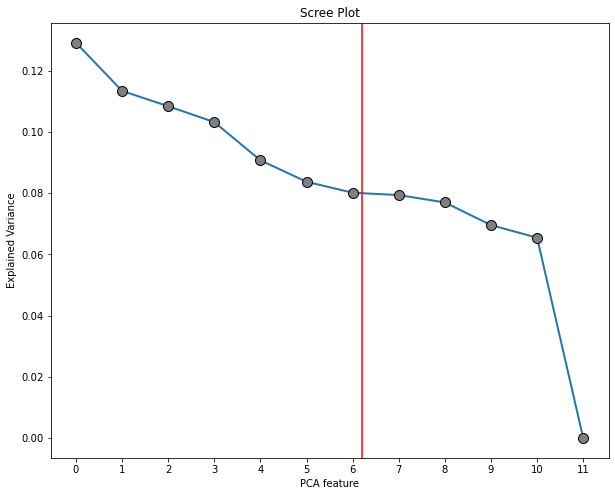

In [284]:
# INSTANTIATING a PCA object with no limit to principal components
psychometric_personality_scaled_pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_personality_scaled_pca_all = psychometric_personality_scaled_pca.fit_transform(psychometric_personality_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", psychometric_personality_scaled.shape)
print("PCA shape     :", psychometric_personality_scaled_pca_all.shape)

# calling the scree_plot function
scree_plot(psychometric_personality_scaled_pca, x_value = 6.2, export = False)

# INSTANTIATING a PCA object with 4 components
psychometric_personality_scaled_pca = PCA(n_components = 4,
          random_state = 219)

# FITTING and TRANSFORMING the scaled data
psychometric_personality_scaled_pca_all = psychometric_personality_scaled_pca.fit_transform(psychometric_personality_scaled)

<p>The four PCA components were labeled as follows:</p>
<ol>
  <li><strong>Wallflower:</strong> Specific interests when it came to leading or being in control, they liked to be led and preferred if other people thought for them. A wallflower is someone with an introverted personality type who will attend parties and social gatherings, but will usually distance themselves from the crowd and actively avoid being in the limelight.
 <p>The high value means that individuals here feel very positively about being told what to do rather than being responsible for their own actions.</p></li>
    <br>
  <li><strong>Invests a lot:</strong> These were highly opinionated individuals that loved to take risks, their lack of optimism we believe, fueled that love for daring choices given that they also liked to try new things. These characteristics went in line with the typical mindset of an avid investor.
    <p>The high value means individuals characterized as investors here have very weak feelings about optimism and prefer being more mentally active than physically active.</p></li>
    <br>
  <li><strong>Busy Manager:</strong>The Busy Manager label identifies with individuals who had dominating personalities, they liked to be in control and lead, they were individuals who hardly had any free time and were not creative (we believe they are more comfortable leading others and utilizing skills found in others).
    <p>The high value means the high values regarding control, and a lack of optimism.</p> </li>
    <br>
    <li><strong>Gamer:</strong> The creative gamer is not active when it comes to moving around but shines in their uniquely creative skill, they are open to advising others and are very comfortable being in control.
    <p>The high values indicated creative individuals who were very risk-averse however enjoy being unique, standing out but more mentally active than physically.</p></li>
</ol>

In [285]:
# transposing pca components
factor_loadings_df_psychometric_personality = pd.DataFrame(np.transpose(psychometric_personality_scaled_pca.components_))


# naming rows as original features
factor_loadings_df_psychometric_personality = factor_loadings_df_psychometric_personality.set_index(psychometric_personality.columns)

# saving to Excel
factor_loadings_df_psychometric_personality.to_excel('psychometric_personality_factor_loadings.xlsx')

In [286]:
# analyzing factor strengths per customer
factor_loadings_psychometric_personality = psychometric_personality_scaled_pca.transform(psychometric_personality_scaled)

# converting to a DataFrame
factor_loadings_df_psychometric_personality = pd.DataFrame(factor_loadings_psychometric_personality)

# naming each principal component
factor_loadings_df_psychometric_personality.columns = ['wallflower', 'invests a lot', 'busy manager', 'gamer']

In [287]:
# scaling the pca
pca_scaled_psychometric_personality = unsupervised_scaler(factor_loadings_df_psychometric_personality)

# exploring customers 
print(f"""Number of people over one stdev above: {len(pca_scaled_psychometric_personality['wallflower'][pca_scaled_psychometric_personality['wallflower'] > 1.0])} in wallflower""")
print(f"""Number of people over one stdev below: {len(pca_scaled_psychometric_personality['wallflower'][pca_scaled_psychometric_personality['wallflower'] < -1.0])} in wallflower""")
print(f"""Number of people over one stdev above: {len(pca_scaled_psychometric_personality['invests a lot'][pca_scaled_psychometric_personality['invests a lot'] > 1.0])} in invests a lot""")
print(f"""Number of people over one stdev below: {len(pca_scaled_psychometric_personality['invests a lot'][pca_scaled_psychometric_personality['invests a lot'] < -1.0])} in invests a lot""")

Number of people over one stdev above: 233 in wallflower
Number of people over one stdev below: 262 in wallflower
Number of people over one stdev above: 217 in invests a lot
Number of people over one stdev below: 251 in invests a lot


<h1>Behavior data</h1>
<p>These two columns explain how many apps and what percent of those were free. Since it is an actual measure, it was not grouped with the psychometric data, and no PCA was run as it is not worth decreasing the number of components since there are only two features. It was only scaled to be used in the clustering.</p>

In [288]:
# applying the unsupervised_scaler function
behaviour_scaled = unsupervised_scaler(behaviour)

# naming the column name
behaviour_scaled.columns = ['count_apps', 'free_apps']

In [289]:
#merge the scaled pcas to make clusters
pca_data = pd.concat([behaviour_scaled, pca_scaled, pca_scaled_psychometric_personality, pca_scaled_psychometric_usage], axis = 1)

# checking data
pca_data.head(n=5)

,count_apps,free_apps,money conscious shopaholic,big tech spender,big non tech spender,working parent (young child),on a budget,wallflower,invests a lot,busy manager,gamer,Golden age,tech hater,online communication,info/news junkie,networking junkie,hard worker
0,-2.039806,-2.396960,-0.928222,-1.691975,0.273474,-0.433568,-0.634053,0.860350,-1.845871,-2.053100,0.349418,0.114128,-0.350160,-1.437214,0.683219,1.470949,-0.872015
1,-0.080178,-0.906841,1.073064,0.360162,1.565782,2.851132,-0.104612,2.031170,1.622760,0.764528,-0.336586,-0.714120,1.971696,0.987021,0.133476,-0.376167,-0.776893
2,-2.039806,0.583278,-1.493572,-1.411556,0.902233,-0.211973,2.294804,-0.829707,-1.666636,1.611691,-1.132443,0.578644,1.032352,-1.795688,-0.329628,-0.191983,0.706850
3,-1.059992,-1.651901,-1.580727,-1.934048,0.956664,-0.333147,-0.038583,1.532020,0.252774,1.352446,1.003073,-1.206509,1.995155,-0.232609,1.053755,-1.150560,0.311223
4,-1.059992,-0.906841,0.810460,-0.480202,-0.655537,-0.960444,-0.160372,2.178361,-1.229288,-0.235656,-1.761886,1.287158,-0.539153,0.600282,-0.400355,0.512654,-3.120554


<h2>Clustering</h2>
<p>The dendrogram below shows how the observations were grouped. We decided to use four clusters to separate the red group shown below so each cluster would be more evenly distributed. Also, when using only three clusters one of the groups was barely explained by the PCA columns, meaning there were many diverging thoughts within the group.</p>

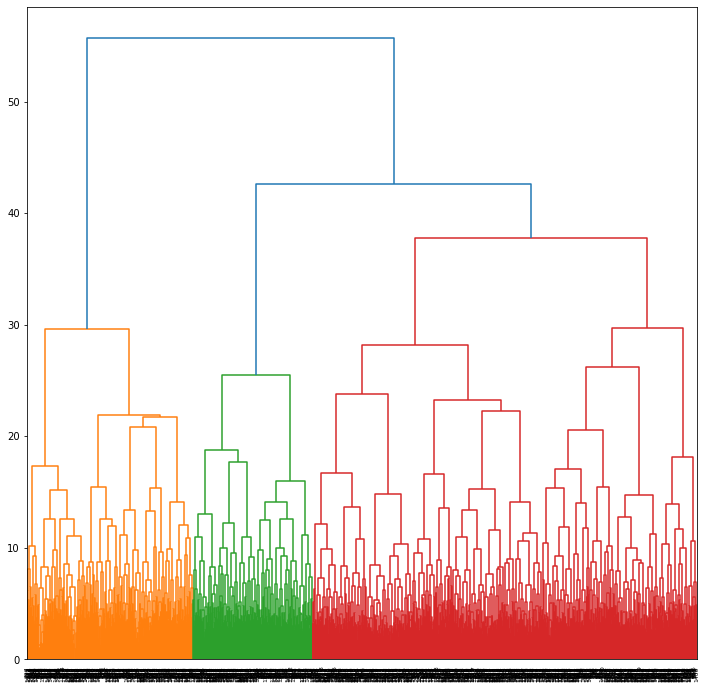

In [290]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_data,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [291]:
# INSTANTIATING a k-Means object with five clusters
data_k_pca = KMeans(n_clusters   = 4,
                        random_state = 219)


# fitting the object to the data
data_k_pca.fit(pca_data)


# converting the clusters to a DataFrame
data_kmeans_pca = pd.DataFrame({'Cluster': data_k_pca.labels_})


# checking the results
print(data_kmeans_pca.iloc[: , 0].value_counts())

1    465
0    411
2    352
3    324
Name: Cluster, dtype: int64


<p><strong>Pocket-Friendly: </strong> People that spend little money, especially on apps and gadgets. As a company that is going to produce an app. We would not want to target them to make a profit, as they would not make the purchase.</p> 
<p><strong>Tech is Fun:</strong> Tech-savvy people that are always aware of developments in the industry and like to purchase new apps and gadgets to try them out. A new app is likely to draw their attention, especially if it is one that is not currently available.</p>
<p><strong>Workflow Only:</strong> Serious minded people who tend to use technology for networking or to improve their efficiency. They don’t seem to use it for fun, so any app made to target this group would have to be a networking app or a useful app that can make their life easier.</p>
<p><strong>Old school Heroes:</strong> Old souls that like to invest and spend money on tech-related companies. They are on a budget but make exceptions for what interests them, and especially for investing in something that could make them money. Apps that could spark their interest likely help them manage their expenses or something related. </p>

,count_apps,free_apps,money conscious shopaholic,big tech spender,big non tech spender,working parent (young child),on a budget,wallflower,invests a lot,busy manager,gamer,Golden age,tech hater,online communication,info/news junkie,networking junkie,hard worker
0,-0.38,0.74,-0.10,-0.73,-0.09,-0.27,0.41,0.31,-0.46,0.25,0.33,-0.13,0.64,-0.46,-0.10,-0.01,0.27
1,0.52,-0.03,-0.28,0.26,-0.15,-0.46,-0.51,-0.47,0.25,-0.38,0.11,-0.41,-0.67,-0.09,-0.08,-0.32,-0.16
2,-0.02,-0.30,0.28,0.05,-0.37,0.81,-0.23,-0.52,-0.30,0.05,-0.28,-0.30,-0.19,0.37,-0.06,0.68,0.33
3,-0.24,-0.57,0.23,0.51,0.73,0.12,0.47,0.86,0.54,0.17,-0.27,1.08,0.35,0.31,0.31,-0.26,-0.46


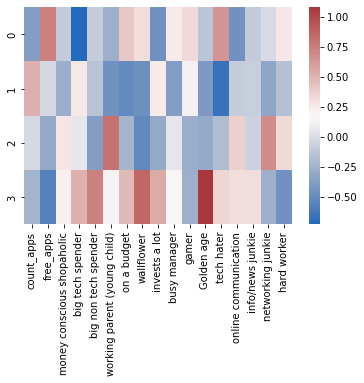

In [292]:
# storing cluster centers
centroids_pca = data_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = pca_data.columns


# checking results (clusters = rows, pc = columns)
sns.heatmap(centroids_pca_df.round(2), cmap="vlag")
centroids_pca_df.round(2)

In [293]:
# concatinating all column together
factor_loadings_data = pd.concat([behaviour_scaled, factor_loadings_df, factor_loadings_df_psychometric_personality, factor_loadings_df_psychometric_usage], axis = 1)

# checking the data
factor_loadings_data.head(n =5)

,count_apps,free_apps,money conscious shopaholic,big tech spender,big non tech spender,working parent (young child),on a budget,wallflower,invests a lot,busy manager,gamer,Golden age,tech hater,online communication,info/news junkie,networking junkie,hard worker
0,-2.039806,-2.396960,-1.236356,-2.089530,0.322868,-0.481367,-0.680722,1.071016,-2.153167,-2.341512,0.388846,0.222276,-0.511859,-1.838674,0.820637,1.584882,-0.926873
1,-0.080178,-0.906841,1.429281,0.444787,1.848589,3.165455,-0.112312,2.528526,1.892913,0.871926,-0.374567,-1.390820,2.882196,1.262728,0.160322,-0.405303,-0.825767
2,-2.039806,0.583278,-1.989381,-1.743222,1.065192,-0.235342,2.463712,-1.032870,-1.944093,1.838096,-1.260228,1.126968,1.509076,-2.297281,-0.395927,-0.206854,0.751318
3,-1.059992,-1.651901,-2.105468,-2.388482,1.129454,-0.369875,-0.041423,1.907153,0.294855,1.542432,1.116260,-2.349795,2.916488,-0.297584,1.265700,-1.239677,0.330802
4,-1.059992,-0.906841,1.079502,-0.593033,-0.773938,-1.066328,-0.172176,2.711757,-1.433937,-0.268760,-1.960698,2.506869,-0.788126,0.767960,-0.480879,0.552362,-3.316867


In [294]:
# concatinating cluster memberships
clst_pca_df = pd.concat([data_kmeans_pca,
                          factor_loadings_data],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([demographic, 
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)

final_pca_clust_df.head()

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57,Cluster,count_apps,free_apps,money conscious shopaholic,big tech spender,big non tech spender,working parent (young child),on a budget,wallflower,invests a lot,busy manager,gamer,Golden age,tech hater,online communication,info/news junkie,networking junkie,hard worker
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,4,1,0,0,0,0,2,2,5,1,0,-2.04,-2.40,-1.24,-2.09,0.32,-0.48,-0.68,1.07,-2.15,-2.34,0.39,0.22,-0.51,-1.84,0.82,1.58,-0.93
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,5,1,0,1,1,0,0,3,2,10,2,3,-0.08,-0.91,1.43,0.44,1.85,3.17,-0.11,2.53,1.89,0.87,-0.37,-1.39,2.88,1.26,0.16,-0.41,-0.83
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,4,0,0,0,1,0,2,2,6,1,0,-2.04,0.58,-1.99,-1.74,1.07,-0.24,2.46,-1.03,-1.94,1.84,-1.26,1.13,1.51,-2.30,-0.40,-0.21,0.75
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,1,0,1,1,0,0,1,2,5,1,0,-1.06,-1.65,-2.11,-2.39,1.13,-0.37,-0.04,1.91,0.29,1.54,1.12,-2.35,2.92,-0.30,1.27,-1.24,0.33
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,2,1,0,0,0,0,3,2,4,2,3,-1.06,-0.91,1.08,-0.59,-0.77,-1.07,-0.17,2.71,-1.43,-0.27,-1.96,2.51,-0.79,0.77,-0.48,0.55,-3.32


In [295]:
# rename the column name that we use in our analysis
final_pca_clust_df = final_pca_clust_df.rename(columns = {'q1':'age', 'q54':'race', 'q56':'income'})

# rename the demographic data (q1)
age_categories  = {1 : 'under 18',
                 2 : '18-24',
                 3: '25-29',
                 4:'30-34',
                 5:'35-39',
                 6: '40-44',
                 7:'45-49',
                 8:'50-54',
                 9:'55-59',
                 10:'60-64',
                 11:'65 or over'}
final_pca_clust_df['age'].replace(age_categories, inplace = True)

# renaming the cluster name
final_pca_clust_df['Cluster'] = final_pca_clust_df['Cluster'].map({0: 'Pocket-Friendly',
                               1: 'Tech is Fun',
                               2: 'Workflow Only',
                               3: 'Old school Heroes'})

# rename the demographic data (q54)
race = {1 : 'White or Caucasian',
                 2 : 'Black or African American',
                 3 : 'Asian',
                 4 : 'Native Hawaiian or Other Pacific Islander',
                 5 : 'American Indian or Alaska Native',
                 6 : 'Other race'}

final_pca_clust_df['race'].replace(race, inplace = True)

# rename the demographic data (q56)
income = {1 : 'Under $10,000',
                 2 : '$10,000-$14,999',
                 3 : '$15,000-$19,999',
                 4 : '$20,000-$29,999',
                 5 : '$30,000-$39,999',
                 6 : '$40,000-$49,999',
                 7 : '$50,000-$59,999',
                 8 : '$60,000-$69,999',
                 9 : '$70,000-$79,999',
                 10 : '$80,000-$89,999',
                 11 : '$90,000-$99,999',
                 12 : '$100,000-$124,999',
                 13 : '$125,000-$149,999',
                 14 : '$150,000 and over'}

final_pca_clust_df['income'].replace(income, inplace = True)

In [296]:
# checking the results
final_pca_clust_df.head(n=5)

,caseID,age,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,race,q55,income,q57,Cluster,count_apps,free_apps,money conscious shopaholic,big tech spender,big non tech spender,working parent (young child),on a budget,wallflower,invests a lot,busy manager,gamer,Golden age,tech hater,online communication,info/news junkie,networking junkie,hard worker
0,1,60-64,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,4,1,0,0,0,0,Black or African American,2,"$30,000-$39,999",1,Pocket-Friendly,-2.04,-2.40,-1.24,-2.09,0.32,-0.48,-0.68,1.07,-2.15,-2.34,0.39,0.22,-0.51,-1.84,0.82,1.58,-0.93
1,2,35-39,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,5,1,0,1,1,0,0,Asian,2,"$80,000-$89,999",2,Old school Heroes,-0.08,-0.91,1.43,0.44,1.85,3.17,-0.11,2.53,1.89,0.87,-0.37,-1.39,2.88,1.26,0.16,-0.41,-0.83
2,3,45-49,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,4,0,0,0,1,0,Black or African American,2,"$40,000-$49,999",1,Pocket-Friendly,-2.04,0.58,-1.99,-1.74,1.07,-0.24,2.46,-1.03,-1.94,1.84,-1.26,1.13,1.51,-2.30,-0.40,-0.21,0.75
3,4,45-49,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,1,0,1,1,0,0,White or Caucasian,2,"$30,000-$39,999",1,Pocket-Friendly,-1.06,-1.65,-2.11,-2.39,1.13,-0.37,-0.04,1.91,0.29,1.54,1.12,-2.35,2.92,-0.30,1.27,-1.24,0.33
4,6,18-24,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,2,1,0,0,0,0,Asian,2,"$20,000-$29,999",2,Old school Heroes,-1.06,-0.91,1.08,-0.59,-0.77,-1.07,-0.17,2.71,-1.43,-0.27,-1.96,2.51,-0.79,0.77,-0.48,0.55,-3.32


<h1>Analyses</h1>
<p>According to the boxplot, we find out that we will focus on tech is fun cluster because we see that tech is fun cluster is interested in technology. They always keep up with tech and it is easy to draw their attention.</p>
<p>We suggest a marketer focus on Asian groups who have income around 40,000-59,999 USD. For the range of age, focus on age under 18, 18-24 and 45-49 and 55-59 because they like to have many applications. Moreover, people in tech is fun cluster are willing to pay money on technology stuff and they are non-price sensitive. The characteristic of these groups is risk-takers means they like to try new things. Our target group likes to use technology to find information or read the news but not for entertainment. So, if we have to launch or create some apps, we will create the application about the data or information centre to share the knowledge or news.
 </p>


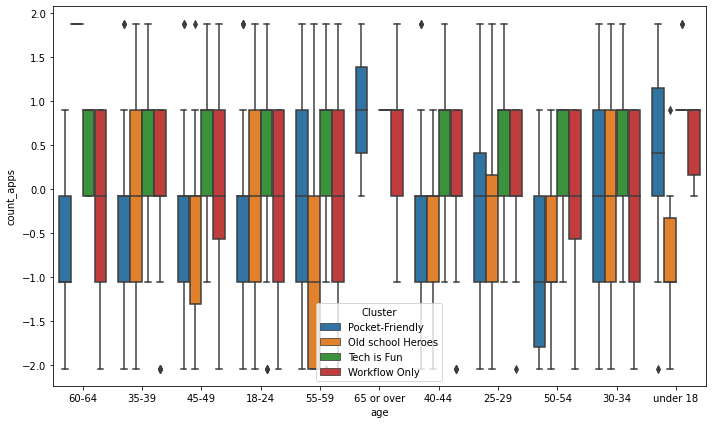

In [297]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'age',
            y = 'count_apps',
            hue = 'Cluster',
            data = final_pca_clust_df)



# formatting and displaying the plot
plt.tight_layout()
plt.show()

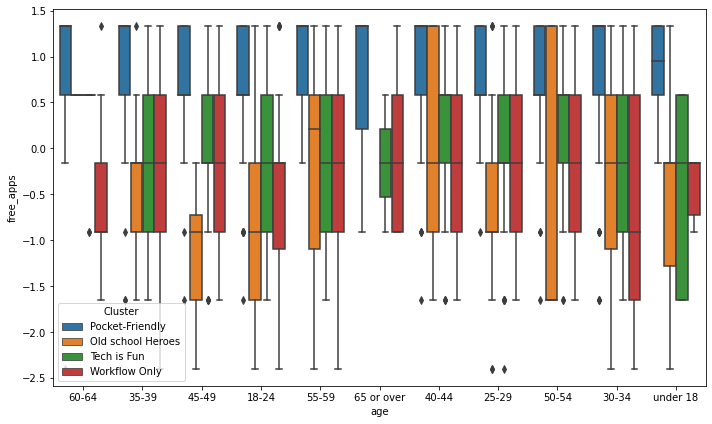

In [298]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'age',
            y = 'free_apps',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

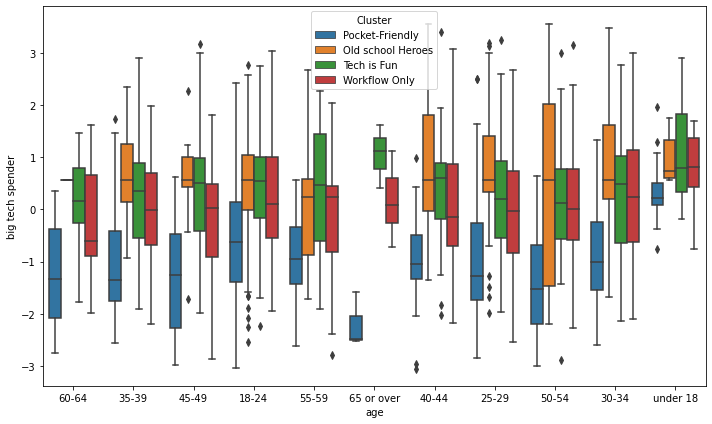

In [299]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'age',
            y = 'big tech spender',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

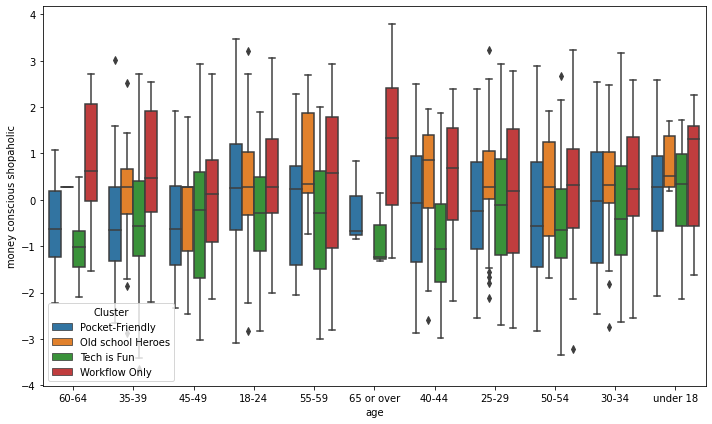

In [300]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'age',
            y = 'money conscious shopaholic',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

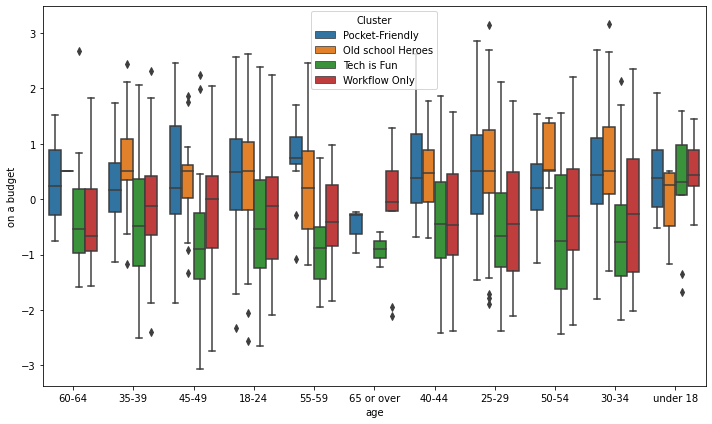

In [301]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'age',
            y = 'on a budget',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

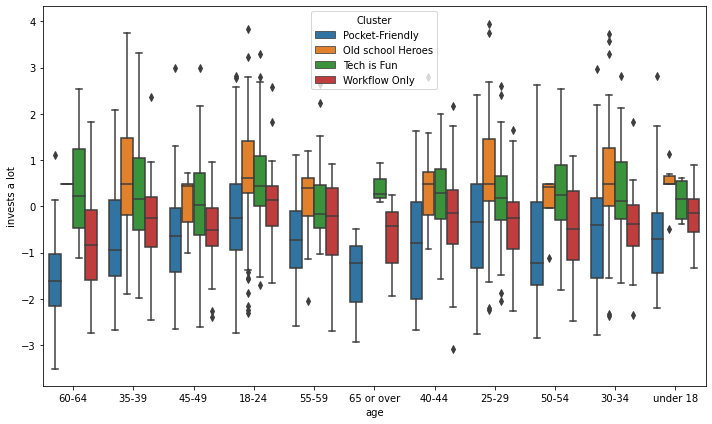

In [302]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'age',
            y = 'invests a lot',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

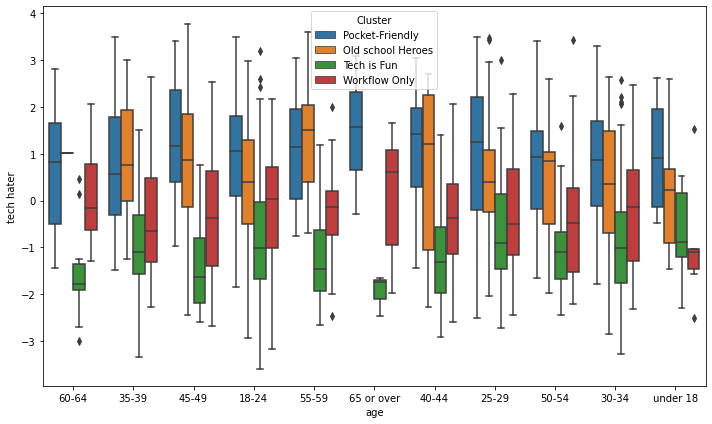

In [303]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'age',
            y = 'tech hater',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

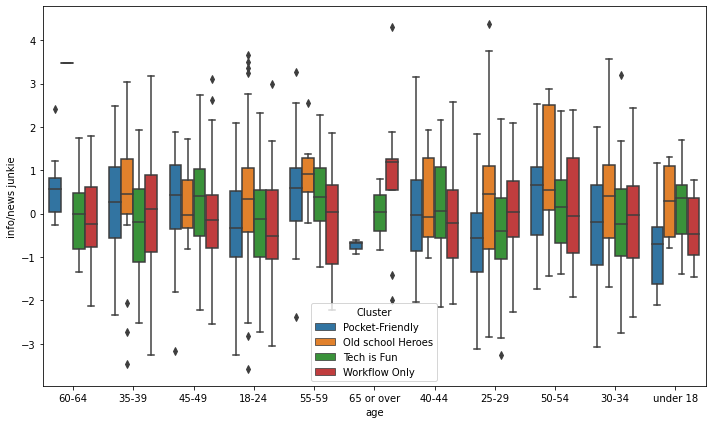

In [304]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'age',
            y = 'info/news junkie',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

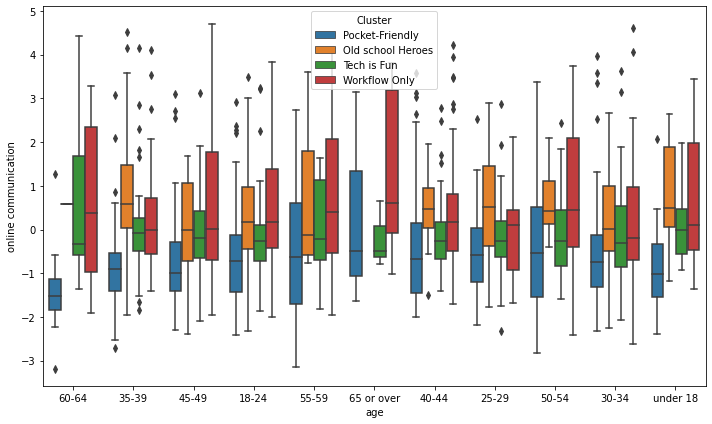

In [305]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'age',
            y = 'online communication',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

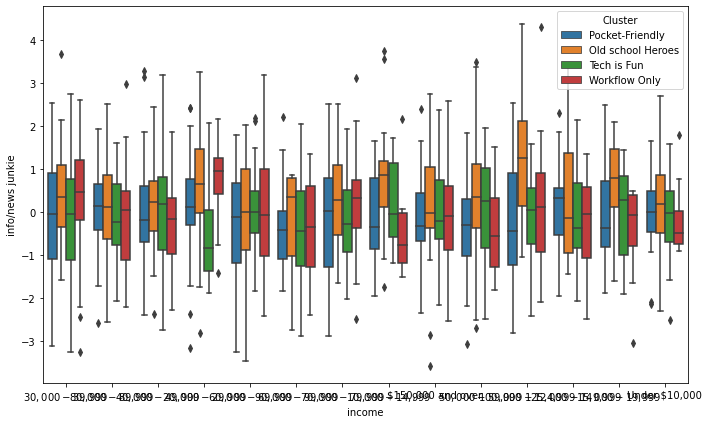

In [306]:
# Carnivores
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'income',
            y = 'info/news junkie',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

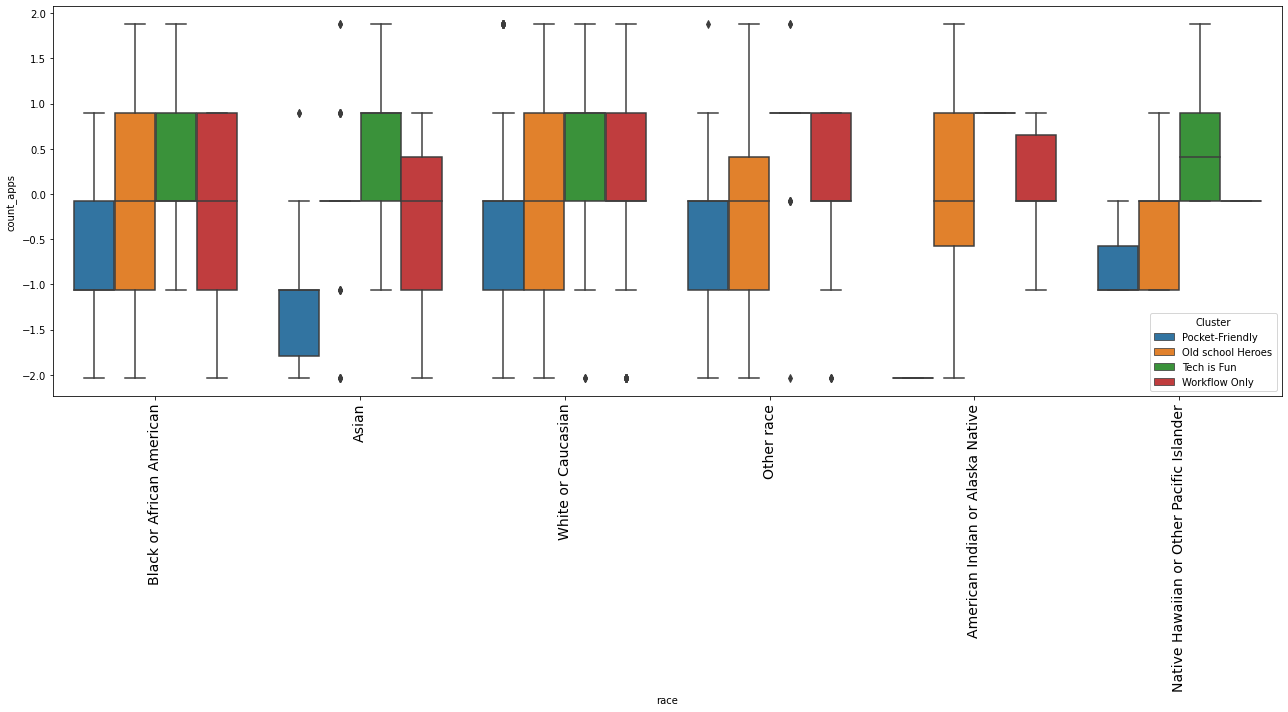

In [307]:
# Carnivores
fig, ax = plt.subplots(figsize = (18, 10))
sns.boxplot(x = 'race',
            y = 'count_apps',
            hue = 'Cluster',
            data = final_pca_clust_df)



# formatting and displaying the plot
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

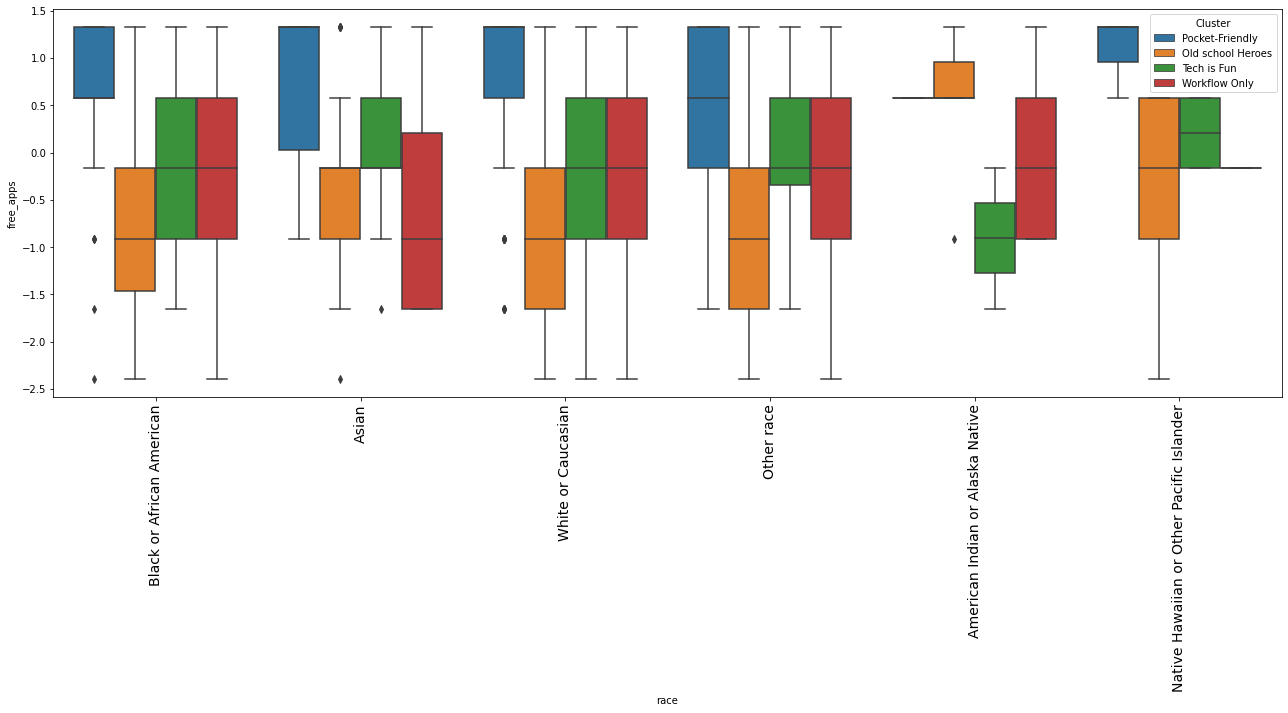

In [308]:
# Carnivores
fig, ax = plt.subplots(figsize = (18, 10))
sns.boxplot(x = 'race',
            y = 'free_apps',
            hue = 'Cluster',
            data = final_pca_clust_df)



# formatting and displaying the plot
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

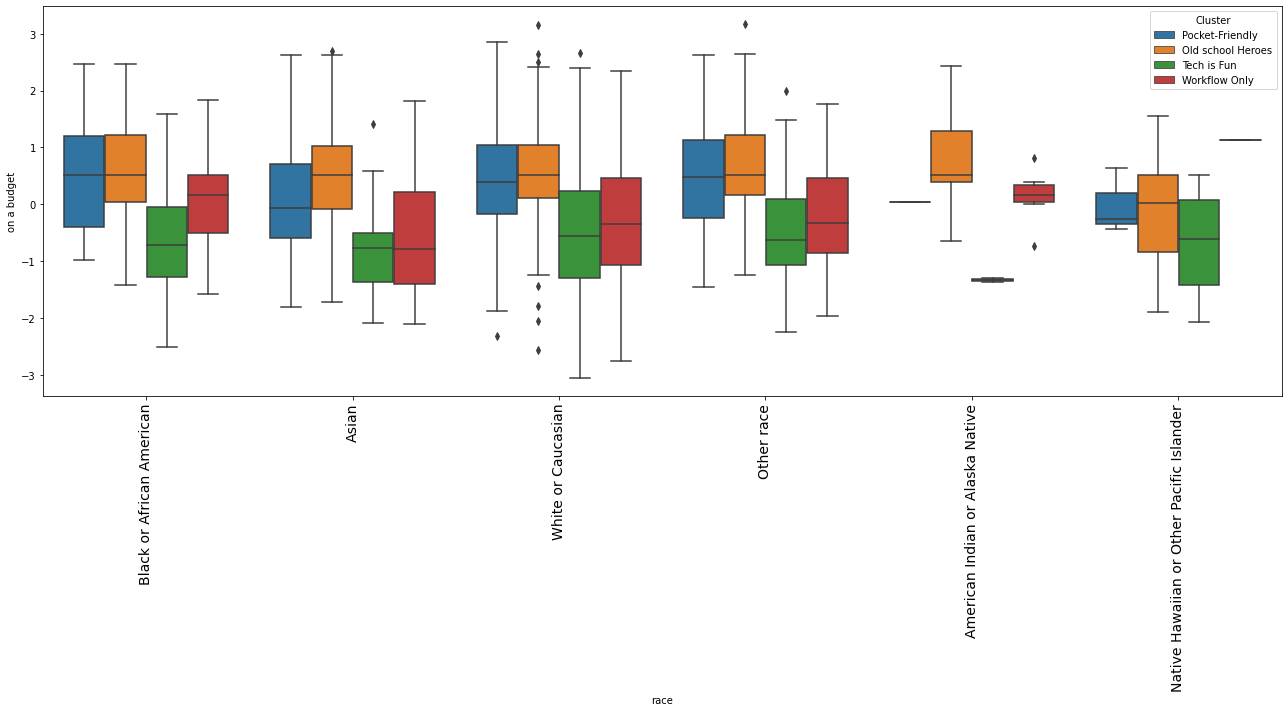

In [309]:
# Carnivores
fig, ax = plt.subplots(figsize = (18,10))
sns.boxplot(x = 'race',
            y = 'on a budget',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

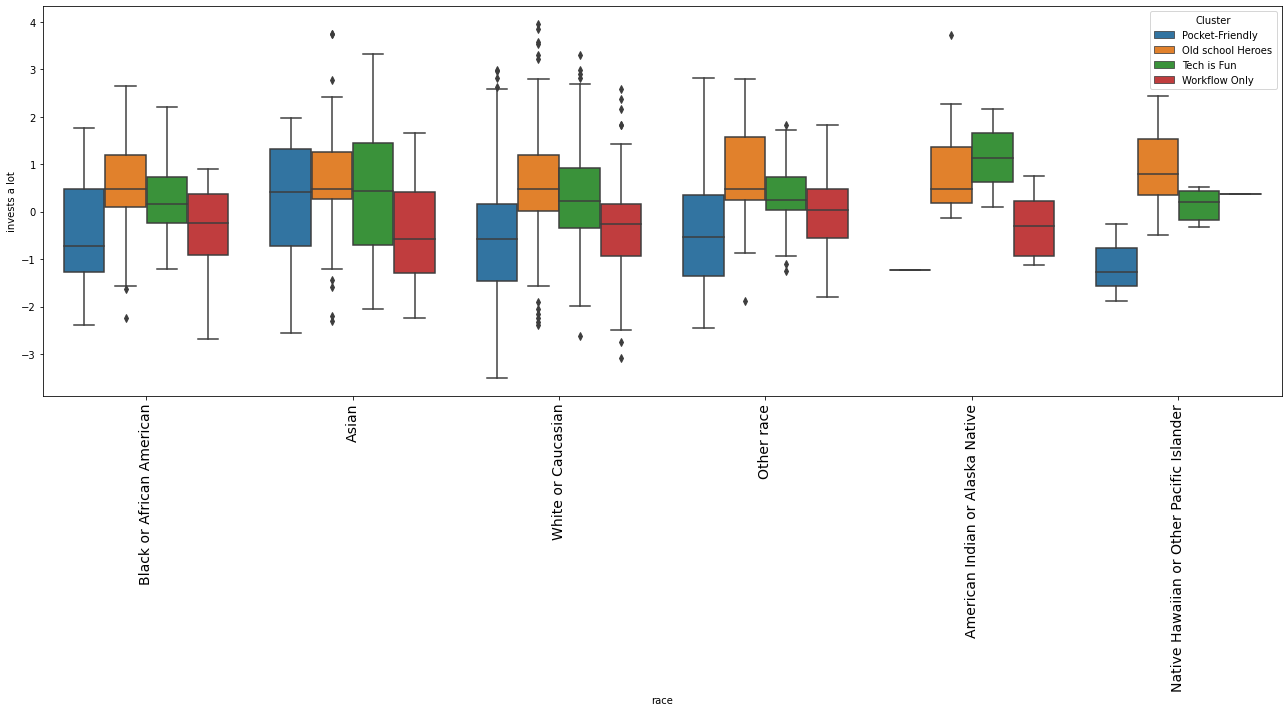

In [310]:
# Carnivores
fig, ax = plt.subplots(figsize = (18, 10))
sns.boxplot(x = 'race',
            y = 'invests a lot',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

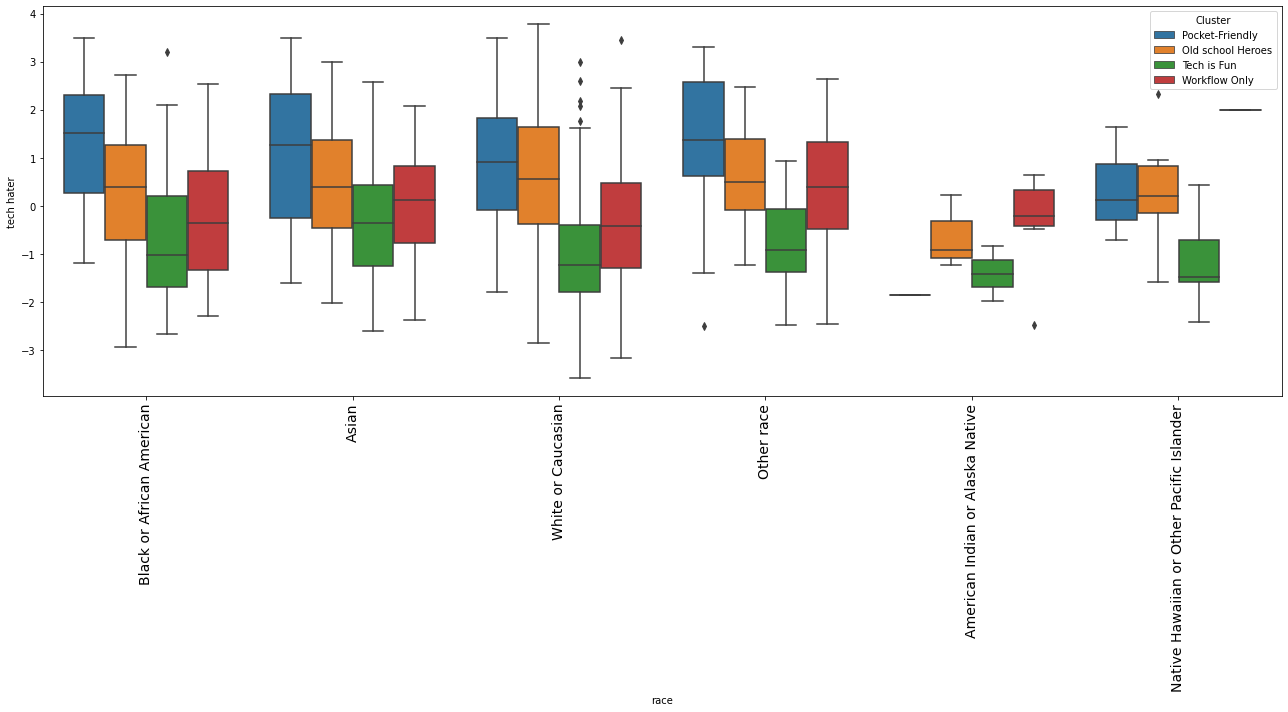

In [311]:
# Carnivores
fig, ax = plt.subplots(figsize = (18, 10))
sns.boxplot(x = 'race',
            y = 'tech hater',
            hue = 'Cluster',
            data = final_pca_clust_df)

# formatting and displaying the plot
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()

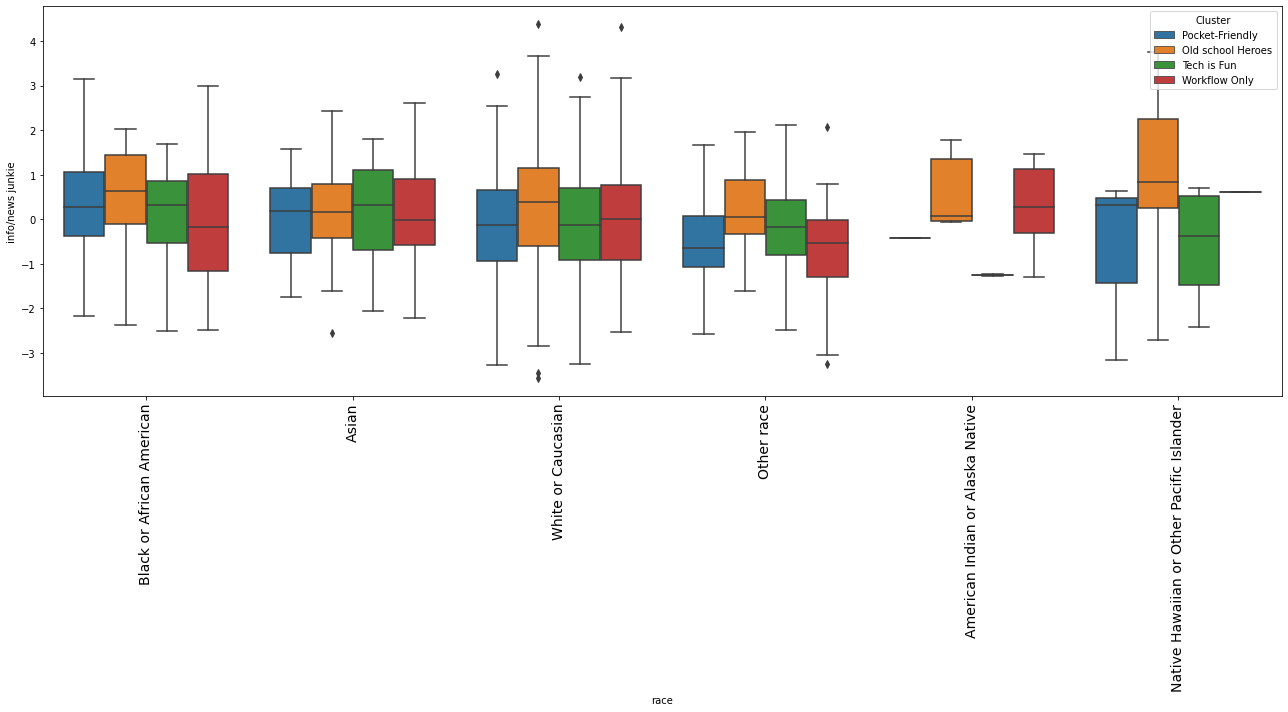

In [312]:
# Carnivores
fig, ax = plt.subplots(figsize = (18, 10))
sns.boxplot(x = 'race',
            y = 'info/news junkie',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()
plt.show()